<div align='center'><h2>DM Lesson 5</h2></div>

**Importation des librairies**

In [156]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Extraction des données**

<div align='justify'>Les données sont issues de :  
https://www.ameli.fr/l-assurance-maladie/statistiques-et-publications/donnees-statistiques/professionnels-de-sante-liberaux/honoraires/honoraires-totaux-et-moyens.php.</div>

**Données sur les honoraires totaux des professionnels de santé par département et par spécialité**

In [157]:
df = pd.read_excel("table_honoraires.xls", 2)

In [158]:
df.dtypes

Spécialistes                           object
DEPARTEMENT                            object
EFFECTIFS                               int64
HONORAIRES SANS DEPASSEMENT (Euros)    object
DEPASSEMENTS (Euros)                   object
FRAIS DE DEPLACEMENT (Euros)           object
TOTAL DES HONORAIRES (Euros)           object
dtype: object

<div align='justify'>Il y a des valeurs non communiquées "nc" vont poser problème et ne seront pas utiles pour étudier le lien entre les effectifs et les dépassements d'honoraires. Nous allons donc les supprimer.</div>

In [160]:
df_clean = df[df['DEPASSEMENTS (Euros)'] != 'nc']

<div align='justify'>La variable "DEPASSEMENTS (Euros)" a ensuite été convertie en valeurs numériques.</div>

In [161]:
df_clean['DEPASSEMENTS (Euros)'] = pd.to_numeric(
    df_clean['DEPASSEMENTS (Euros)'])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [162]:
df_clean.describe()

,EFFECTIFS,DEPASSEMENTS (Euros)
count,3380.000000,3.380000e+03
mean,224.367751,9.074740e+06
std,3084.021549,1.037291e+08
min,0.000000,0.000000e+00
25%,0.000000,0.000000e+00
50%,15.000000,7.355036e+04
75%,43.000000,1.511962e+06
max,114030.000000,2.996448e+09


In [163]:
df_clean[df_clean['EFFECTIFS'] < 4]

,Spécialistes,DEPARTEMENT,EFFECTIFS,HONORAIRES SANS DEPASSEMENT (Euros),DEPASSEMENTS (Euros),FRAIS DE DEPLACEMENT (Euros),TOTAL DES HONORAIRES (Euros)
8,02- Anesthésie-réanimation chirurgicale,09- Ariège,0,0,0.00,0,0
48,02- Anesthésie-réanimation chirurgicale,48- Lozère,0,22499.3,1789.61,3.81,24292.7
101,02- Anesthésie-réanimation chirurgicale,976- Mayotte,0,0,0.00,0,0
104,20- Réanimation médicale,01- Ain,0,0,0.00,0,0
105,20- Réanimation médicale,02- Aisne,0,0,0.00,0,0
...,...,...,...,...,...,...,...
5659,38- Médecins biologistes,43- Haute-Loire,0,0,0.00,0,0
5662,38- Médecins biologistes,46- Lot,0,0,0.00,0,0
5664,38- Médecins biologistes,48- Lozère,0,0,0.00,0,0
5681,38- Médecins biologistes,65- Hautes-Pyrénées,0,0,0.00,0,0


On note également que certains départements ne contiennent aucun spécialiste :
* Et n'ont donc aucun dépassement d'honoraires puisque pas de médecins. Ces lignes sont à supprimer puisqu'il est plus cohérent de comparer des départements qui contiennent au moins 3 médecins. 
* Et ont tout de même une valeur pour les dépassements d'honoraires, ce qui n'est pas logique. Ces lignes sont à supprimer. 

In [164]:
df_clean = df_clean.drop(df_clean[df_clean['EFFECTIFS'] < 4].index)
df_clean = df_clean.drop(
    df_clean[df_clean["DEPASSEMENTS (Euros)"] == 0.0].index)

In [165]:
df_clean.describe()

,EFFECTIFS,DEPASSEMENTS (Euros)
count,1994.000000,1.994000e+03
mean,380.292879,1.538240e+07
std,4008.275498,1.347046e+08
min,5.000000,1.260000e+00
25%,18.000000,2.290734e+05
50%,33.000000,1.136501e+06
75%,87.000000,3.771391e+06
max,114030.000000,2.996448e+09


**Peut-on établir un lien entre la densité de médecins par spécialité et par territoire et la pratique du dépassement d'honoraires ?**

Première observation des liens entre dépassements d'honoraires et densité des médecins par départements et spécialités.

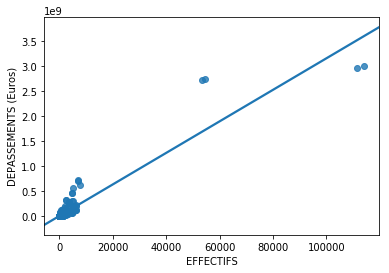

In [166]:
sns.regplot(x=df_clean["EFFECTIFS"],
            y=df_clean["DEPASSEMENTS (Euros)"], ci=None)

<div align='justify'>Il est difficile d'observer la corrélation à cause de certains points extrêmes. Nous allons filtrer les données sur les effectifs de médecins de manière à éliminer les individus extrêmes/particuliers. En ne gardant que les départements où le nombre de médecins par spécialités est inférieur à 100, on se rapproche de la normalité.</div>

In [167]:
df_clean = df_clean[df_clean["EFFECTIFS"] < 100]

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


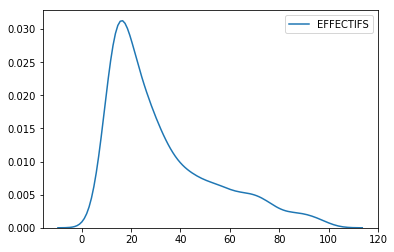

In [168]:
sns.kdeplot(df_clean["EFFECTIFS"])

Par ailleurs, observons la distribution des dépassements honoraires. 

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


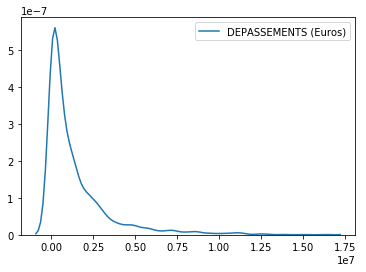

In [169]:
sns.kdeplot(df_clean["DEPASSEMENTS (Euros)"])

In [170]:
df_clean = df_clean[df_clean["DEPASSEMENTS (Euros)"] < 0.75e7]

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


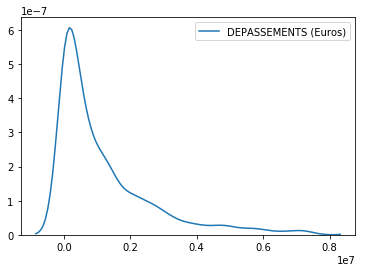

In [171]:
sns.kdeplot(df_clean["DEPASSEMENTS (Euros)"])

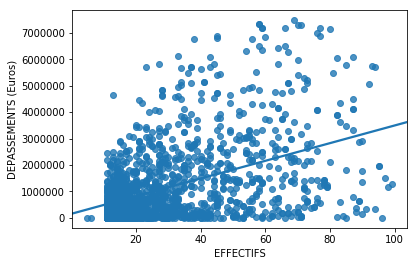

In [172]:
sns.regplot(x=df_clean["EFFECTIFS"],
            y=df_clean["DEPASSEMENTS (Euros)"], ci=None)

<div align='justify'>Globalement, on ne voit pas apparaître de lien entre la densité de médecins par spécialité et par département et le dépassement d'honoraires. Peut-être faudrait-il étudier ces liens par spécialité.</div>

In [173]:
df_clean.corr(method='pearson')

,EFFECTIFS,DEPASSEMENTS (Euros)
EFFECTIFS,1.000000,0.446958
DEPASSEMENTS (Euros),0.446958,1.000000


Le coefficient de corrélation entre les deux variables est de 0.447, ce qui est faible mais peut suggérer une tendance positive. Cela est corroboré par le graphique représentant les dépassements d'honoraires en fonction des effectifs.  
Dans les départements aux effectifs faibles, il y a des médecins ayant des dépassements d'honoraires importants, tout comme dans les départements aux effectifs proche de 100. 

**Est-ce dans les territoires où la densité est la plus forte que les médecins pratiquent le moins les dépassements d'honoraires ?**

Grâce aux résultats précédents, on peut dire que dans les départements où la densité de médecins est la plus forte, les médecins pratiquent des dépassements d'honoraires aussi bien faibles qu'élevés.

**Est-ce que la densité de certains médecins / praticiens est corrélée à la densité de population pour certaines classes d'âges (bébé/pédiatre, personnes âgées / infirmiers etc...) ?**

Téléchargeons le jeu de données de l'INSEE répertoriant la densité de population par département en 2017.

In [188]:
pop = pd.read_excel("population.xls", '2017', header=4)

In [189]:
pop.head()

,Unnamed: 0,Unnamed: 1,0 à 4 ans,5 à 9 ans,10 à 14 ans,15 à 19 ans,20 à 24 ans,25 à 29 ans,30 à 34 ans,35 à 39 ans,...,55 à 59 ans.2,60 à 64 ans.2,65 à 69 ans.2,70 à 74 ans.2,75 à 79 ans.2,80 à 84 ans.2,85 à 89 ans.2,90 à 94 ans.2,95 ans et plus.2,Total.2
0,01,Ain,39532.0,44621.0,44591.0,38959.0,30145.0,35691.0,40544.0,42670.0,...,20777.0,19134.0,18201.0,13057.0,9730.0,9081.0,6915.0,3593.0,1049.0,326447.0
1,02,Aisne,31488.0,35191.0,35324.0,33021.0,25493.0,28739.0,31382.0,31770.0,...,18316.0,18183.0,17885.0,11595.0,9465.0,9409.0,7140.0,3593.0,833.0,273944.0
2,03,Allier,15432.0,17462.0,18776.0,17865.0,14344.0,15294.0,16322.0,17564.0,...,12416.0,13170.0,13552.0,10313.0,8303.0,8407.0,6657.0,3311.0,946.0,175805.0
3,04,Alpes-de-Haute-Provence,7707.0,8795.0,9531.0,8645.0,6251.0,7253.0,8302.0,8745.0,...,6090.0,5883.0,6211.0,4995.0,3800.0,3408.0,2540.0,1487.0,428.0,83245.0
4,05,Hautes-Alpes,7096.0,8073.0,8452.0,7493.0,5784.0,6733.0,7679.0,8539.0,...,5098.0,5178.0,5031.0,3694.0,2939.0,2780.0,2088.0,1241.0,442.0,72070.0


In [190]:
pop = pop.rename(columns={"Unnamed: 0": "dep_id", "Unnamed: 1": "dep"})

In [191]:
pop['DEPARTEMENT'] = pop.dep_id.astype(
    str).str.cat(pop.dep.astype(str), sep='- ')

In [192]:
pop = pop.drop(["dep_id", "dep", "Total.2"], axis=1)

In [195]:
tab = pd.merge(df, pop, on=['DEPARTEMENT'])

*Lien entre la densité de pédiatre et la densité de bébés*  
Les pédiatres sont indiqués par '12- Pédiatrie' dans la colonne 'Spécialistes'.

In [197]:
tab_enfant = tab[tab['Spécialistes'] == '12- Pédiatrie']

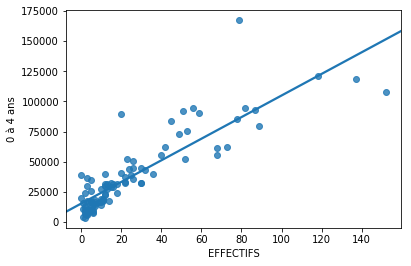

In [200]:
sns.regplot(x=tab_enfant["EFFECTIFS"], y=tab_enfant["0 à 4 ans"], ci=None)

In [209]:
tab_enfant['EFFECTIFS'].corr(tab_enfant['0 à 4 ans'])

0.8705439146165433

Ici, la corrélation est élevée. Plus il y a de bébés, plus il y a de pédiatres.

*Lien entre la densité de rhumatologues et la densité de personnes âgées*  
Les rhumatologues sont indiqués par '14- Rhumatologie' dans la colonne 'Spécialistes'.

In [207]:
tab_age = tab[tab['Spécialistes'] == '14- Rhumatologie']

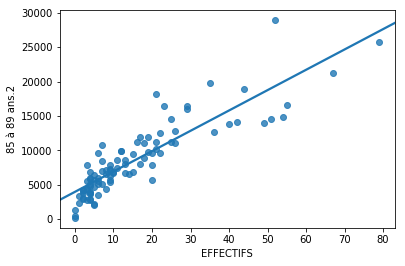

In [208]:
sns.regplot(x=tab_age["EFFECTIFS"], y=tab_age["85 à 89 ans.2"], ci=None)

In [210]:
tab_age['EFFECTIFS'].corr(tab_age['85 à 89 ans.2'])

0.8794783246010214

La corrélation est également élevée ici. 
Plus il y a de personnes âgées, plus il y a de rhumatologues.